## Impact of local and non-local modulation of significant wave height
### Jackson Krieger
**10/29/2024**

In [15]:
import xarray as xr
import numpy as np
import sys
sys.path.append('/Users/jkrieger/work/member-Krieger/saildrone_analysis/Pilot_Analysis_NBs')
import saildrone_analysis as sd
import matplotlib.pyplot as plt

In [16]:
# Pilot campaign data
pilot_1062 = xr.load_dataset('/Users/jkrieger/work/member-Krieger/saildrone_analysis/Saildrones/SMODE_Pilot_1062.nc')
pilot_1072 = xr.load_dataset('/Users/jkrieger/work/member-Krieger/saildrone_analysis/Saildrones/SMODE_Pilot_1072.nc')
pilot_1073 = xr.load_dataset('/Users/jkrieger/work/member-Krieger/saildrone_analysis/Saildrones/SMODE_Pilot_1073.nc')
pilot_1074 = xr.load_dataset('/Users/jkrieger/work/member-Krieger/saildrone_analysis/Saildrones/SMODE_Pilot_1074.nc')
pilot_1075 = xr.load_dataset('/Users/jkrieger/work/member-Krieger/saildrone_analysis/Saildrones/SMODE_Pilot_1075.nc')

# SMODE data
wind_smode_2021 = xr.open_dataset('/Users/jkrieger/work/member-Krieger/saildrone_analysis/smode_data/wind_smode_2021.nc')

# NCOM
ncom = xr.open_dataset('/Users/jkrieger/work/member-Krieger/saildrone_analysis/smode_data/NCOM_2021.nc')

# Current
current_2021 = xr.open_dataset('/Users/jkrieger/work/member-Krieger/saildrone_analysis/smode_data/current_2021.nc')

# WAVEWATCH
ww_2021 = xr.load_dataset('/Users/jkrieger/work/member-Krieger/saildrone_analysis/smode_data/WW3_SMODE_Pilot.nc')

# Buoy
buoy_ds = xr.open_dataset('/Users/jkrieger/work/member-Krieger/saildrone_analysis/smode_data/029p1_historic.nc')

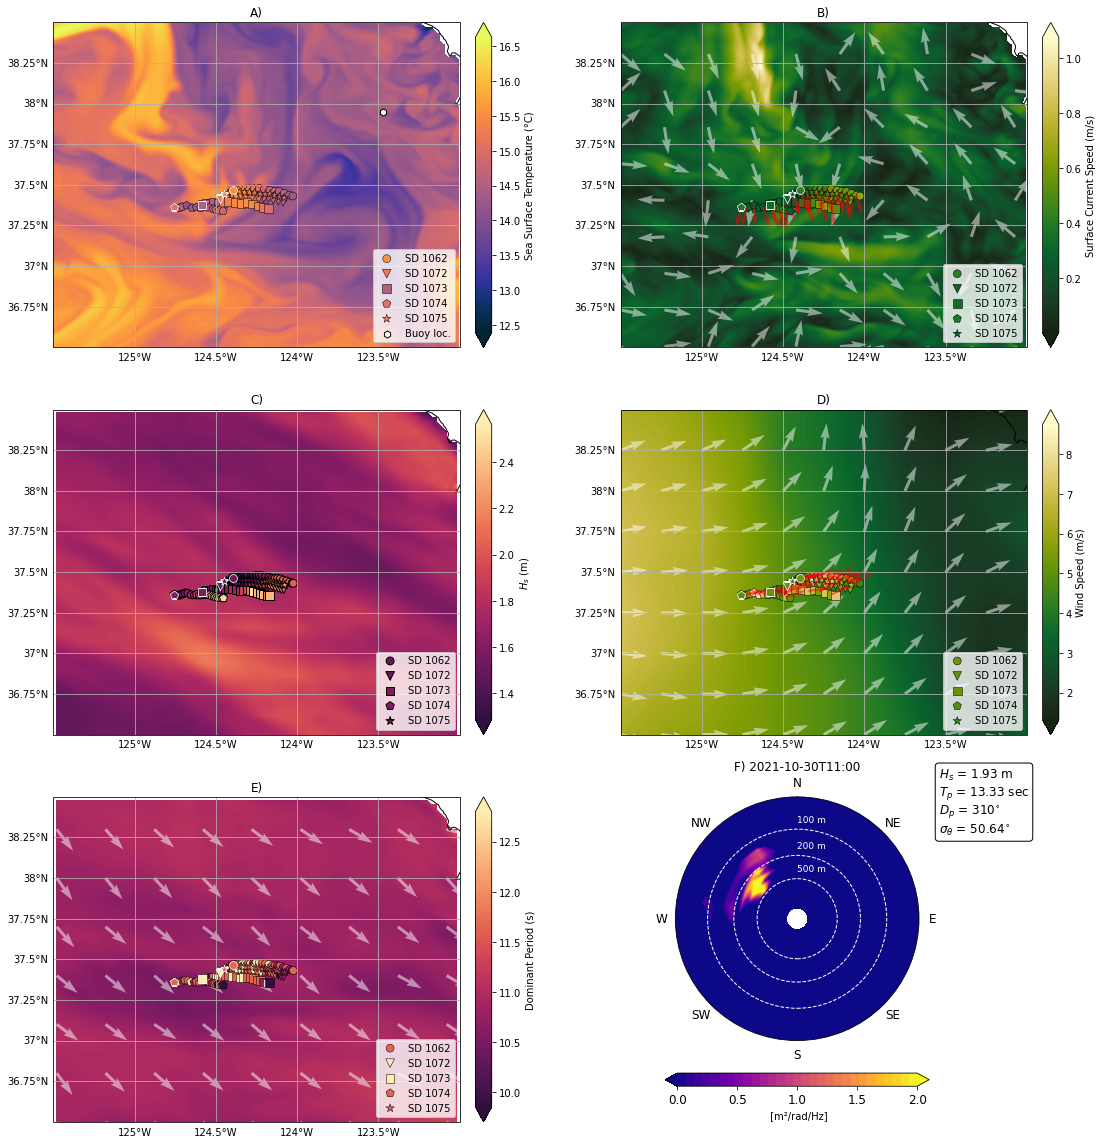

In [17]:
plt.rcParams['font.family'] = 'sans-serif'  # Choose desired font family
plt.rcParams['font.size'] = 15 # increase fontsize

date_saildrone_obs = np.datetime64('2021-10-30T11:00') # studied date
buoy_slice = buoy_ds.sel(waveTime = date_saildrone_obs, method = 'nearest')

# compute 2d spectrum
ds_spec = sd.buoy_spectrum2d(buoy_slice.waveEnergyDensity.values,\
                          buoy_slice.waveA1Value.values, \
                          buoy_slice.waveA2Value.values,\
                          buoy_slice.waveB1Value.values,\
                          buoy_slice.waveB2Value.values,
                          buoy_slice.waveFrequency.values,\
                          date_saildrone_obs,\
                          dirs = np.arange(0,365,10))

hs, tp, dp, sigma_th = sd.compute_wave_parameter(ds_spec) # compute wave parameters to display in directional spectrum plot

start_date = '2021-10-30T11:00:00.000000000' # start date and time of front
end_date = '2021-10-30T22:00:00.000000000' # end date and time of front
saildrones = [pilot_1062, pilot_1072, pilot_1073, pilot_1074, pilot_1075] # array of saildrone data 
models = [ncom, wind_smode_2021, current_2021, ww_2021] # array of model data
front_fig = sd.model_front_validation_w_spec(saildrones, models, start_date, end_date, buoy_ds, ds_spec, scatter_step=10, time_step=20)

**Figure 1: Subplot of ocean variables from models (background maps) and Saildrone measurements along their trajectories (markers). The first saildrone observations are represented with the white marker. The background maps correspond to the time of the first Saildrone observation. Panel (A) shows the sea surface temperature (SST), (B) shows the surface currents, model data are from Naval Coastal Operational Model (NCOM). Panel (C) and (E) show the Significant wave height ($H_{s}$) and the dominant wave period ($T_{p}$) respectively, model data is from WAVEWATCH III. Panel (D) shows the wind speed, model data is from the fifth generation ECMWF atmospheric reanalysis (ERA-5). Grey arrows depict variable directions according to the model data and red arrows depict variable directions as recorded by the Saildrones. Panel (F) is the frequency-direction wave spectrum observed by the closest wave buoy (station-029).**

#########\
**Figure 2 is a GIF of the evolution of figure 1 over time.** \
**The file size is too large for GitHub to display in a notebook.** \
**The link below will take you to the gif in another tab.** \
#########

[Click here to view figure 2](https://github.com/mines-oceanography/saildrone_synthesis/blob/main/figures/refraction_front.gif)

**Figure 2: Subplot gif of figure 1. Saildrone observations and trajectory as well as directional wave spectrum evolve as time increases in 30 minute increments.**

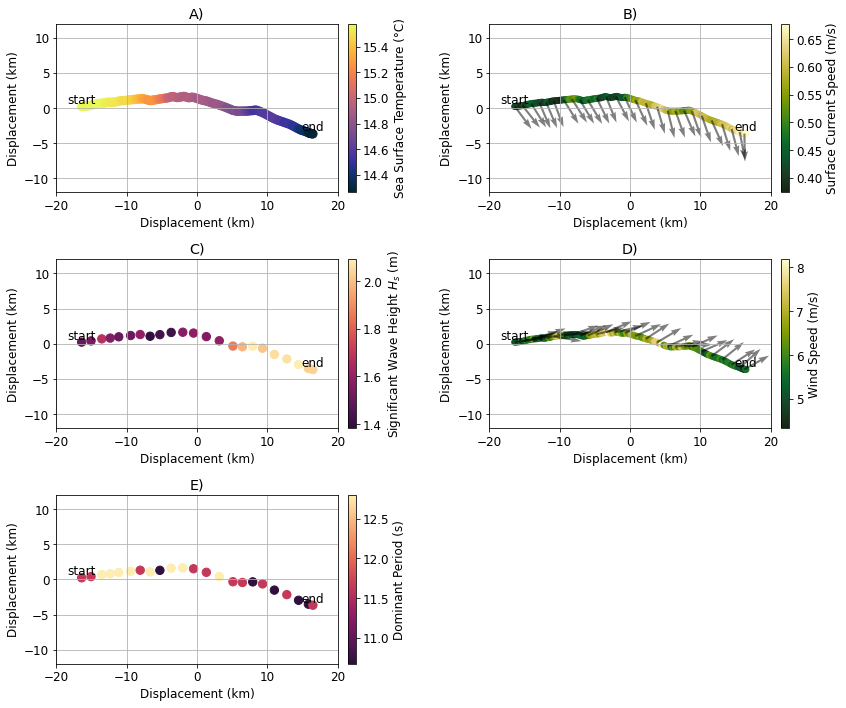

In [18]:
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.size'] = 12 # decrease fontsize to fit with subplots

fig = sd.single_sd_front_scatters(pilot_1062, start_date, end_date, time_step=5, ylim=12)

**Figure 3: Zoomed in subplot around Saildrone 1062 trajectory, Saildrone of interest for this particular front. X and Y axes are converted to displacement in kilometers from longitude and latitude.  Plotted variables are (A) sea surface temperature, (B) surface current speed, (C) significant wave height ($H_s$), (D) wind speed, and (E) dominant period ($T_p$).**

#########\
**Figure 4 is a GIF of the evolution of figure 3 over time with model data and wave spectrum added.** \
**The file size is too large for GitHub to display in a notebook.** \
**The link below will take you to the gif in another tab.** \
#########

[Click here to view figure 3](https://github.com/mines-oceanography/saildrone_synthesis/blob/main/figures/sd_1062_zoomed_refraction_front.gif)

**Figure 4: Subplot gif of figure 3 with model data and wave spectrum added. Saildrone observations and trajectory as well as directional wave spectrum evolve as time increases. Grey arrows depict variable directions according to the model data and red arrows depict variable directions as recorded by the Saildrone.**

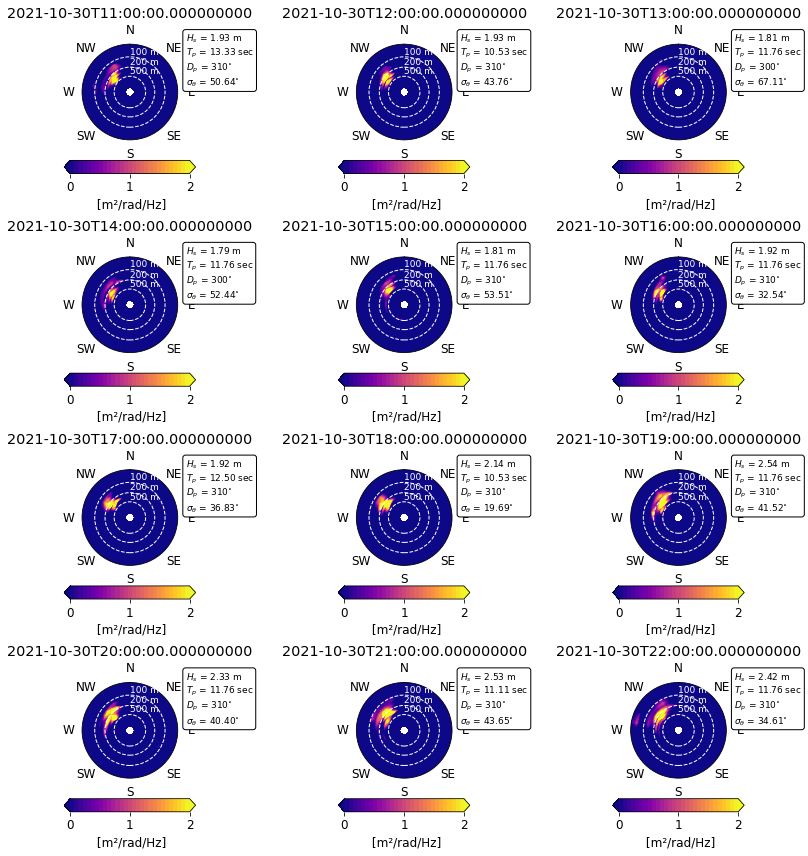

In [19]:
spec = sd.plot_wave_parameters_over_time(buoy_ds, start_date, end_date)

**Figure 5: Static time series subplot of directional wave spectrum calculated from observations recorded by moored CDIP buoy 029. The spectrum represents surface wave energy along wavelength and direction in polar coordinates.**

|**Campaign**|**Saildrone**|**Start**|**End**|**Mean Sea Surface Temperature (˚C)**|**Mean Surface Current Speed (m/s)**|**Mean Significant Height $H_s$ (m)**|**Mean Wind Speed (m/s)**|**Mean Dominant Period $T_p$ (s)**|
|:-------|:---------:|:---------:|:---------:|:---------:|:-------:|:-------:|:-------:|-------:|
|Pilot|1062|10/30 11:00|10/30 22:00|14.97|0.28|1.72|6.08|11.83|
|Pilot|1072|10/30 11:00|10/30 22:00|15.16|0.30|1.76|6.17|11.89|
|Pilot|1073|10/30 11:00|10/30 22:00|15.08|0.31|1.86|6.12|11.95|
|Pilot|1074|10/30 11:00|10/30 22:00|14.72|0.34|1.98|5.95|11.57|
|Pilot|1075|10/30 11:00|10/30 22:00|15.15|0.30|1.79|6.12|11.50|

**Table 1: Table summarizing wave variable averages presented for all Saildrones along the time of interest.**

### Analysis and summary

While travelling west to east over a distance of 34 km, Saildrone 1062 observed an increase in significant wave height of 0.5 meters along with a 1.3˚C decrease in sea surface temperature. Along with these observations, there is no notable change in wind speed which rules out the possibility of increased wave height due to winds. When analyzing the evolution of the observations in figure 2, there is a slight alignment in the wave and current directions. For the concertina effect to be at play in this case, we would expect to see a decrease in wave height due to their rough alignment. However, this is not the case. Because of the 0.5 meter increase in significant wave height we know that concertina can be ruled out. This leaves refraction as the last mechanism that could be at play. Because of the current jet modeled between 124.5˚ and 125˚ longitude, we have reason to believe that refraction is responsible for the observed enhancement in wave height. In addition to this observation, using the [Mantaray ray tracing Python package](https://github.com/mines-oceanography/mantaray) developed by Bryce Irving, Bia Villas Bôas, and Guillherme Castelao, we were able to confirm the plausibility of refraction.